In [1]:
import numpy as np
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import os
import random

from wordcloud import WordCloud, STOPWORDS


In [2]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [3]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
d

'/home/jovyan/01_worldcloud'

In [5]:
# read the mask image taken from
# http://www.stencilry.org/stencils/movies/star%20wars/storm-trooper.gif
mask = np.array(Image.open(path.join(d, "data/stormtrooper_mask.png")))
mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:

# movie script of "a new hope"
# http://www.imsdb.com/scripts/Star-Wars-A-New-Hope.html
# May the lawyers deem this fair use.
text = open(path.join(d, 'data/a_new_hope.txt')).read()
text[:300]

'\n\n                                        STAR WARS\n\n                                        Episode IV\n\n                                        A NEW HOPE\n\n                                         From the\n                                  JOURNAL OF THE WHILLS\n\n                                    '

In [11]:
# pre-processing the text a little bit
text = text.replace("HAN", "Han")
text = text.replace("LUKE'S", "Luke")

In [12]:
# adding movie script specific stopwords
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [24]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, margin=10,background_color='black', random_state=1).generate(text)

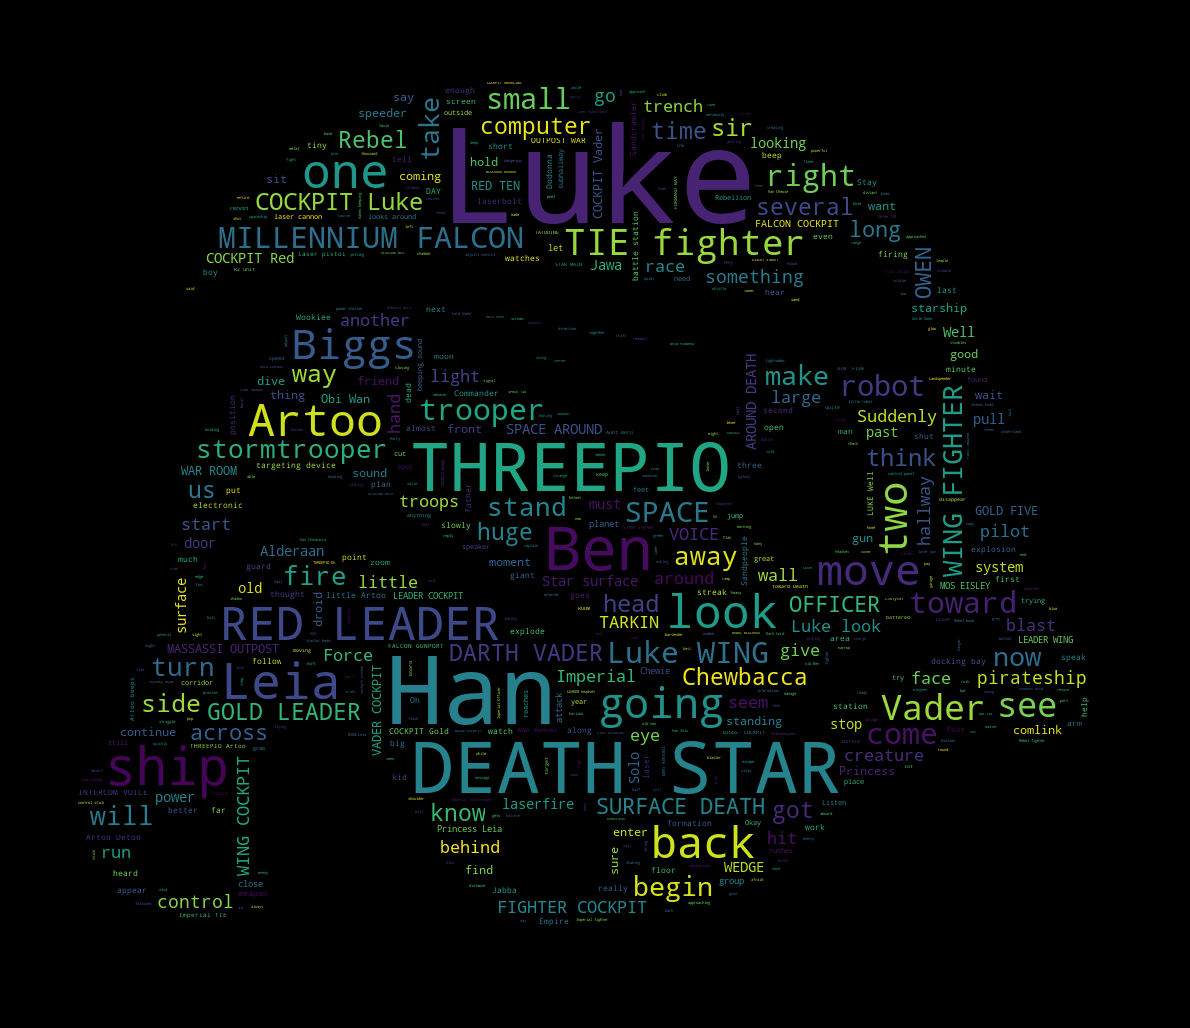

In [25]:
wc.to_image()

In [26]:
wc.to_file("data/a_new_hope.png")

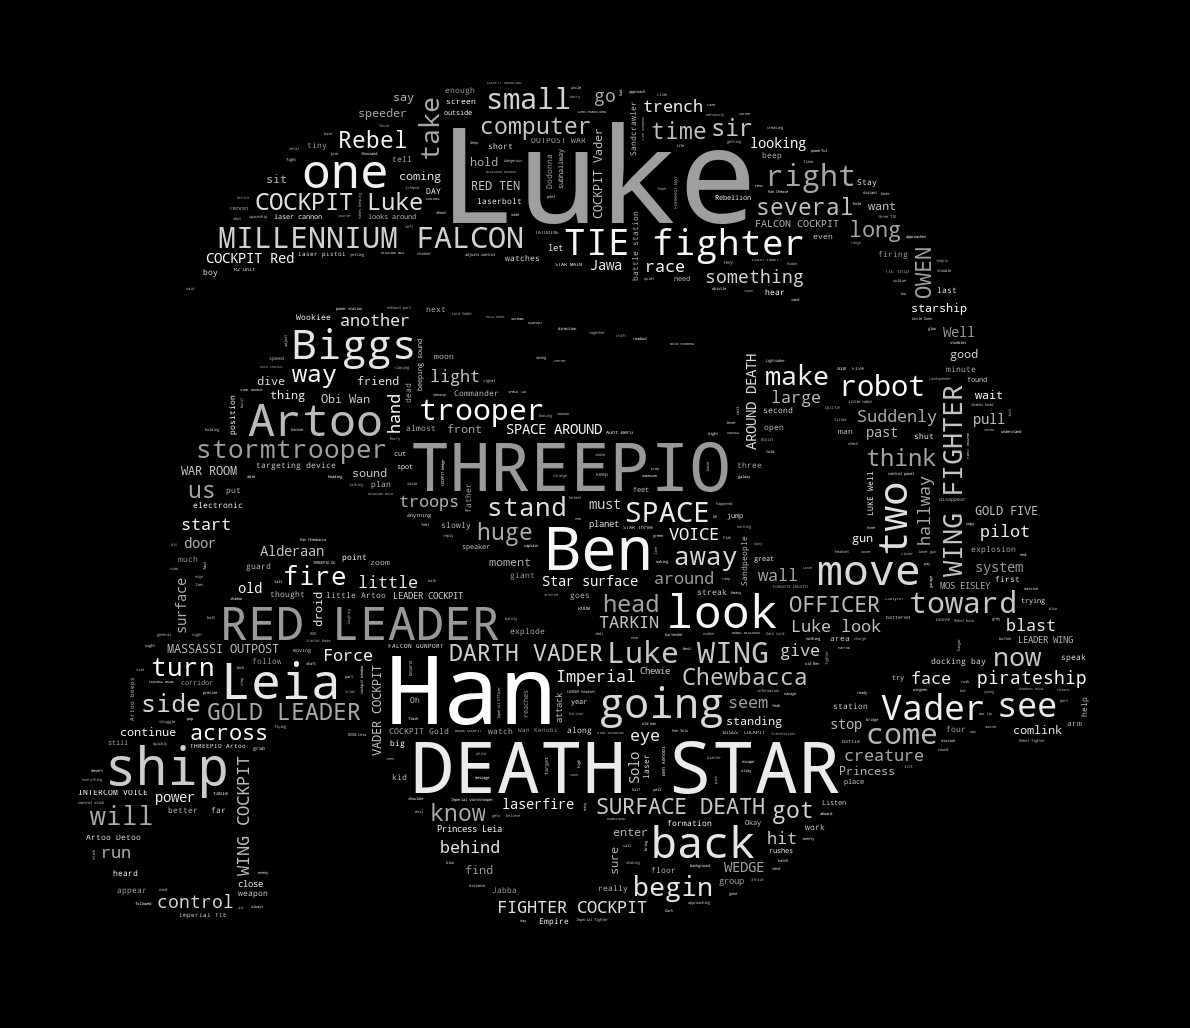

In [28]:
wc2 = wc.recolor(color_func=grey_color_func, random_state=3)
wc2.to_image()

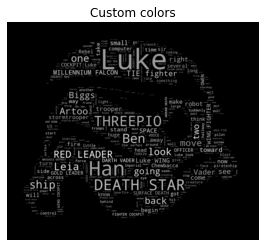

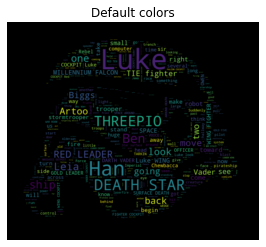

In [27]:
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()